In [1]:

# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers
from scipy.stats import zscore

# Data Pre-processing
#ROC_AUC only handles binary 0,1 values. Using LabelBinarizer to convert y_test and y_pred
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
#import covid19_country.csf file
df=pd.read_csv('covid19_country.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df.shape

(23688, 5)

In [4]:
# checking the datatype
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [5]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


Observation:
    1. No missing values any columns.
    2. one object dtypes and 3 int dtypes.
    3. 23688 rows with 5 columns.

### To check missing value

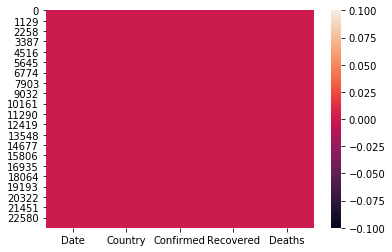

In [9]:
# Checking whether there is null values or not 
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

## Summary Statistics

In [11]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


Conclusion:
    1. Differance between 75% and max is vary large means features have outliers.
    2. Min values for Deaths and Recoverd are zero stating that we have country that have not been affected by the pandemic.
    

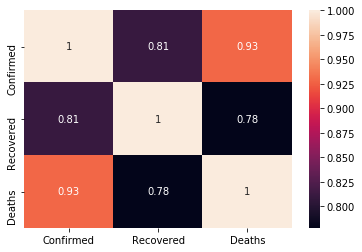

In [12]:
sns.heatmap(df.corr(),cmap='rocket',annot=True)

Observation:
    1. Confirmed case is highly correlated with Recovered and Death.
    2. Deaths and Recovered negatively correlated.

### Exploring Data Variable

In [13]:
# From dates we can get mothly ,daily,yearly average counts of Confirmed,Recoverd,Deaths which can help in data analysis
df_dates=pd.DataFrame()
df_dates['month']=df['Date'].dt.month_name()
df_dates['year']=df['Date'].dt.year
df_dates['day']=df['Date'].dt.day_name()
df_dates['Confirmed']=df['Confirmed']
df_dates['Recovered']=df['Recovered']
df_dates['Deaths']=df['Deaths']
df_dates

,month,year,day,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,0,0,0
1,January,2020,Wednesday,0,0,0
2,January,2020,Wednesday,0,0,0
3,January,2020,Wednesday,0,0,0
4,January,2020,Wednesday,0,0,0
...,...,...,...,...,...,...
23683,May,2020,Tuesday,429,365,3
23684,May,2020,Tuesday,9,6,1
23685,May,2020,Tuesday,249,10,49
23686,May,2020,Tuesday,920,336,7


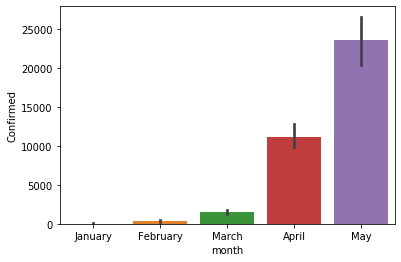

In [14]:
# average confirmed during month of an year 
sns.barplot(x='month',y='Confirmed',data=df_dates)
plt.show()
# it shows average confirmed is increaseing from jan to may

Observation:  it shows average confirmed is increaseing from jan to may

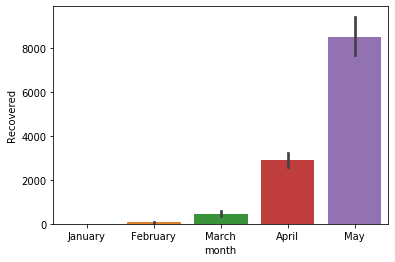

In [15]:
# average recoverd during month of an year 
sns.barplot(x='month',y='Recovered',data=df_dates)
plt.show()
# it shows average recoverd is increaseing from jan to may

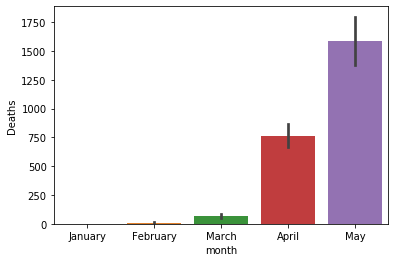

In [16]:
# average deaths during month of an year 
sns.barplot(x='month',y='Deaths',data=df_dates)
plt.show()
# it shows average daeths is increaseing from jan to may

Conclusion: Confirmed ,Recovered and Deaths increaseing from jan to may

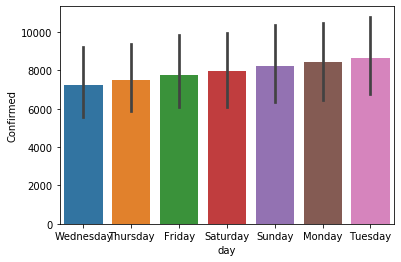

In [17]:
# average confirmed during day of week 
sns.barplot(x='day',y='Confirmed',data=df_dates)
plt.show()

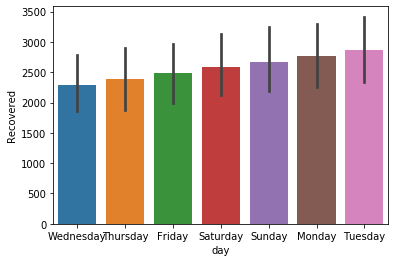

In [18]:
# average recovered during day of week 
sns.barplot(x='day',y='Recovered',data=df_dates)
plt.show()

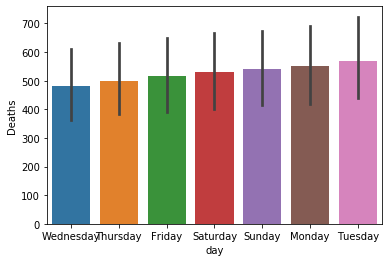

In [19]:
# average deaths during day of week 
sns.barplot(x='day',y='Deaths',data=df_dates)
plt.show()

In [20]:
a = df.Date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-22 00:00:00
The last date is: 2020-05-26 00:00:00


Finding:
    1. From huge dataset find out between day of year and first date and last date.
    2. Data collect from 22-1-2020 to 26-5-2020

In [21]:
top = df[df['Date'] == df['Date'].max()]
world = top.groupby('Country')['Confirmed','Recovered','Deaths'].sum().reset_index()
world.head()

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,11831,1128,220
1,Albania,1029,803,33
2,Algeria,8697,4918,617
3,Andorra,763,676,51
4,Angola,70,18,4


Finding : Between the First Date and Last date Country wise total no find out of Confirmed ,Recovered,Deaths number

In [22]:
top = df[df['Date'] == df['Date'].max()]
top_confirmed = top.groupby(by = 'Country')['Confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_confirmed

,Country,Confirmed
0,US,1680913
1,Brazil,391222
2,Russia,362342
3,United Kingdom,266599
4,Spain,236259
5,Italy,230555
6,France,182847
7,Germany,181200
8,Turkey,158762
9,India,150793


Finding : Acoording to confrmed case number country wise serial no find out

In [23]:
top = df[df['Date'] == df['Date'].max()]
top_deaths = top.groupby(by = 'Country')['Deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,Country,Deaths
0,US,98913
1,United Kingdom,37130
2,Italy,32955
3,France,28533
4,Spain,27117
5,Brazil,24512
6,Belgium,9334
7,Germany,8372
8,Mexico,8134
9,Iran,7508


Finding:- 1 Acoording to Deaths total no between the Date country wise list 
          2 More Deaths in US and India position 15 between date

In [24]:
top= df[df['Date'] == df['Date'].max()]
top_recovered = top.groupby(by = 'Country')['Recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,Country,Recovered
0,US,384902
1,Germany,161967
2,Brazil,158593
3,Spain,150376
4,Italy,144658
5,Russia,131129
6,Turkey,121507
7,Iran,109437
8,China,79358
9,France,65997


Finding:- Country wise serial no according to Recoverd

Conclusion:
    1.  More deaths in Us and Recoverd case also more in US.
    2. Death % more In United Kinkdom as compare to US and or Confirm and Recoverd no.
    3. Death rate is more in Italy also 5 Recoverd rate is more in India 5 Recoverd % in Russia is also better.

In [25]:
#more information about China
china =  df[df.Country == 'China']
china = china.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
china.head()

,Date,Recovered,Deaths,Confirmed
0,2020-01-22,28,17,548
1,2020-01-23,30,18,643
2,2020-01-24,36,26,920
3,2020-01-25,39,42,1406
4,2020-01-26,49,56,2075


In [26]:
#more information about us
us=  df[df.Country == 'US']
us = us.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
us.head()

,Date,Recovered,Deaths,Confirmed
0,2020-01-22,0,0,1
1,2020-01-23,0,0,1
2,2020-01-24,0,0,2
3,2020-01-25,0,0,2
4,2020-01-26,0,0,5


In [27]:
#more information about italy
italy=  df[df.Country == 'Italy']
italy = italy.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
italy.head()

,Date,Recovered,Deaths,Confirmed
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


In [28]:
#more information about India
india=  df[df.Country == 'India']
india = india.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
india.head()

,Date,Recovered,Deaths,Confirmed
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


Conclusion:
    1. Month of Jan and fub number of Confirmed and number of Death not more in US and Italy it increase from march.
    2. But in China number of cases more in moth of jan and feb.

### Bivariate Analysis

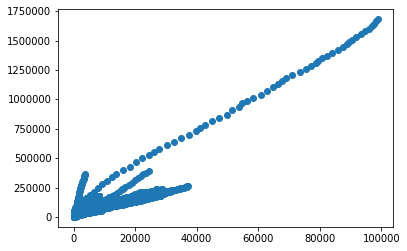

In [29]:
plt.scatter(df_dates['Deaths'],df_dates['Confirmed'])
plt.show()

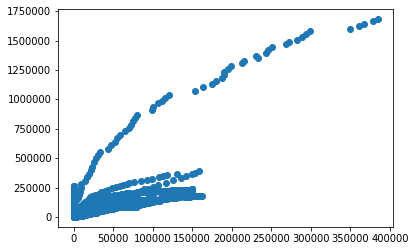

In [30]:
plt.scatter(df_dates['Recovered'],df_dates['Confirmed'])
plt.show()

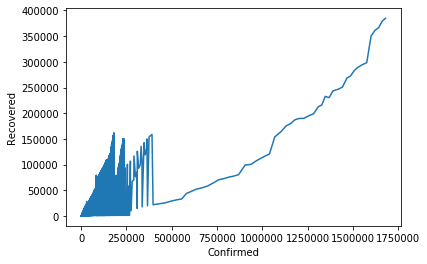

In [31]:
# Using lineplot from seaborn to check how recovered varies with Confirmed
sns.lineplot(x='Confirmed',y='Recovered',data=df)
plt.show()

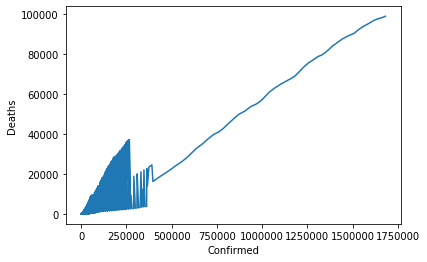

In [32]:
# Using lineplot from seaborn to check how recovered varies with Confirmed
sns.lineplot(x='Confirmed',y='Deaths',data=df)
plt.show()

In [33]:
# Lets check the skewness of the dataset
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [34]:
df=df.drop(columns=['Date','Country'])

In [35]:
df

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013568EE2608>,
      dtype=object)

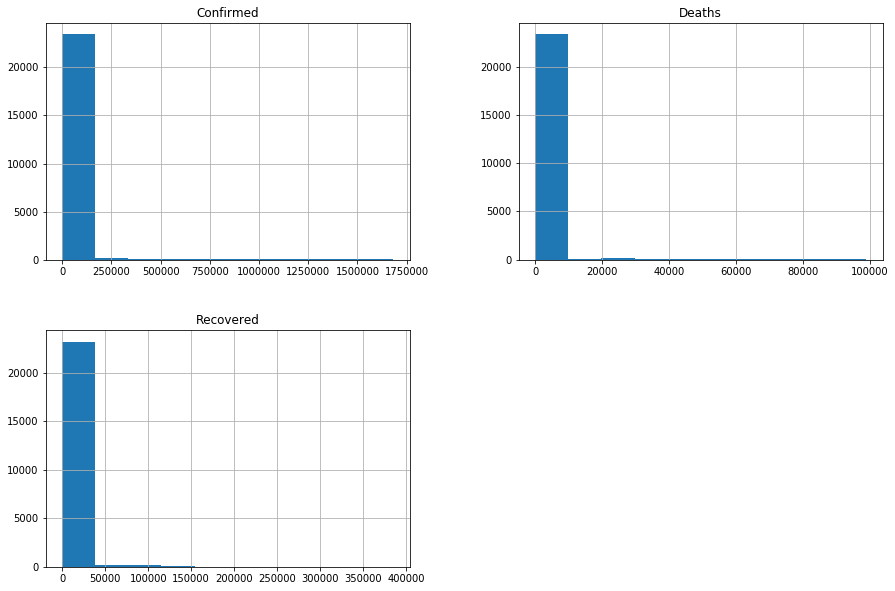

In [36]:
# Bivariate analysis
df.hist(figsize=(15,10))

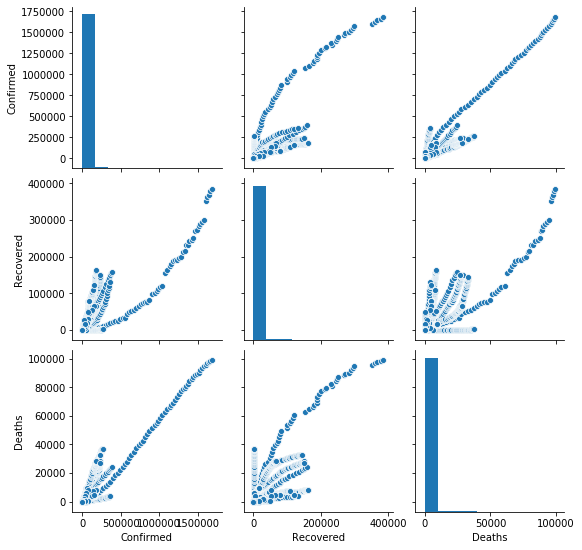

In [37]:

sns.pairplot(df)

### Removing Outliers

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.13641539, 0.17049719, 0.13197356],
       [0.13641539, 0.17049719, 0.13197356],
       [0.13641539, 0.17049719, 0.13197356],
       ...,
       [0.13215314, 0.16983681, 0.11970126],
       [0.12066732, 0.1483084 , 0.13022038],
       [0.13545681, 0.16884624, 0.13097174]])

In [39]:
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [40]:
z[7932][1]

3.13147210893684

In [41]:
z[23678][2]

9.167424195549778

In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
df_new.shape

(23177, 3)

In [44]:
df.shape

(23688, 3)

In [45]:
df=df_new
df.shape

(23177, 3)

Conclusion:- 511 Row detected as outliers.

## Machine Learning Algorithm

In [46]:
# seprating into input and output variable
x=df.drop(columns=['Recovered','Deaths'])
y=pd.DataFrame(df[['Recovered','Deaths']])

In [47]:
# Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.26529598],
       [-0.26529598],
       [-0.26529598],
       ...,
       [-0.23993202],
       [-0.17158177],
       [-0.25959164]])

In [49]:
x.shape

(23177, 1)

In [50]:
y.shape

(23177, 2)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape: ',x_test.shape,'\ny_train.shape',y_train.shape,'y_test.shape',y_test.shape)

x_train.shape:  (16223, 1) x_test.shape:  (6954, 1) 
y_train.shape (16223, 2) y_test.shape (6954, 2)


In [52]:
def models(model, x_train, x_test, y_train, y_test,score):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train,y_train)*100)
    print('\nModel Report')
    print('Score: %0.2f' %(model.score(x_train,y_train)))

In [53]:

model_name,score=[],[]

In [54]:

#Linear Regression
lreg=LinearRegression()
models(lreg,x_train,x_test,y_train,y_test,score)
model_name.append('Linear Regression')


Model Report
Score: 0.65


In [55]:
#K-Neighbors Regressor
knr=KNeighborsRegressor()
mor_knr=MultiOutputRegressor(knr)
models(mor_knr,x_train,x_test,y_train,y_test,score)
model_name.append('K-Neighbors Regressor')


Model Report
Score: 0.72


In [57]:
#Ridge Regression
parameters={'alpha':[0.001,0.01,1]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [58]:
rr=Ridge(alpha=1)
models(rr,x_train, x_test, y_train, y_test,score)
model_name.append('Ridge Regression')


Model Report
Score: 0.65


In [61]:

#Lasso Regression
parameters={'alpha':[0.001,0.01,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [62]:
lr=Lasso(alpha=1)
models(lr,x_train, x_test, y_train, y_test,score)
model_name.append('Lasso Regression')


Model Report
Score: 0.65


In [66]:
#Support Vector Regression
svr=SVR()
mor_svr=MultiOutputRegressor(svr)
models(mor_svr,x_train, x_test, y_train, y_test,score)
model_name.append('Support Vector Regression')


Model Report
Score: 0.11


In [68]:
#Decision Tree Regressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 10, 'min_samples_leaf': 100}

In [69]:
dct=DecisionTreeRegressor(max_depth=10,min_samples_leaf=100)
models(dct,x_train, x_test, y_train, y_test,score)
model_name.append('Decision Tree Regression')


Model Report
Score: 0.70


In [70]:
#Random Forest Regressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [71]:
rf=RandomForestRegressor(n_estimators=200,max_depth=5)
models(rf,x_train, x_test, y_train, y_test,score)
model_name.append('Random Forest Regression')


Model Report
Score: 0.75


In [72]:
final=pd.DataFrame({'Model Name':model_name,'Score':score})
final

,Model Name,Score
0,Linear Regression,64.700233
1,K-Neighbors Regressor,72.479445
2,Ridge Regression,64.700233
3,Lasso Regression,64.700217
4,Lasso Regression,64.700217
5,Support Vector Regression,11.135696
6,Support Vector Regression,11.135696
7,Decision Tree Regression,69.657613
8,Random Forest Regression,74.664507


In [73]:
final=pd.DataFrame({'Model Name':model_name,'Score':score})
final

,Model Name,Score
0,Linear Regression,64.700233
1,K-Neighbors Regressor,72.479445
2,Ridge Regression,64.700233
3,Lasso Regression,64.700217
4,Lasso Regression,64.700217
5,Support Vector Regression,11.135696
6,Support Vector Regression,11.135696
7,Decision Tree Regression,69.657613
8,Random Forest Regression,74.664507


With Random Forest Regression, we were able to achieve 74% score for this dataset.

In [74]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(rf,'rf_COVID19.pkl')

['rf_COVID19.pkl']